## Negative Volume Index

Negative Volume Index (NVI)는 저거래량일에 주식 가격의 변동을 추적하는 기술적 분석 도구다. 이 지표는 폴 디슨(Paul Dysart)에 의해 1930년대에 개발되었으며, 주로 주식 시장의 "스마트 머니"의 움직임을 감지하는 데 사용된다. NVI는 거래량이 전일보다 감소했을 때만 갱신되며, 거래량이 증가하는 날은 무시된다.

NVI의 계산 방법은 다음과 같다

1. 거래량이 전일 대비 감소했을 경우에만 NVI를 갱신한다
2. NVI의 갱신은 가격 변동률에 기반한다

$$\mathrm{NVI}_t = \mathrm{NVI}_{t-1} + (r_t \times \mathrm{NVI}_{t-1})$$

거래량이 증가하는 날은 NVI가 갱신되지 않으므로, 이 지표는 시장의 조용한 기간 동안의 가격 움직임에 대해 더욱 민감하다. NVI가 상승하면, 거래량이 낮은 상황에서 가격이 상승하고 있음을 나타내며, 이는 소수의 투자자가 시장을 조용히 사고 있음을 시사할 수 있다. 반대로 NVI가 하락하면, 거래량이 낮은 상황에서 가격이 하락하고 있음을 나타낸다.

NVI는 종종 Positive Volume Index (PVI)와 함께 사용되며, 두 지표를 통합하여 시장의 보다 폭넓은 분석을 수행할 수 있다. NVI는 특히 장기적인 추세를 파악하는 데 유용하며, 긴 기간 동안 지속적인 상승 또는 하락 추세를 보여줄 때 강력한 신호로 해석될 수 있다.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ta.volume import negative_volume_index
import yfinance as yf

import warnings
warnings.filterwarnings('ignore')

start_date = '2023-01-01'
end_date = '2024-04-14'
ticker = '^GSPC'
data = yf.download(ticker, start = start_date, end = end_date)

[*********************100%%**********************]  1 of 1 completed


In [2]:
nvi = negative_volume_index(
    close = data['Close'],
    volume = data['Volume'],
    fillna = False
)

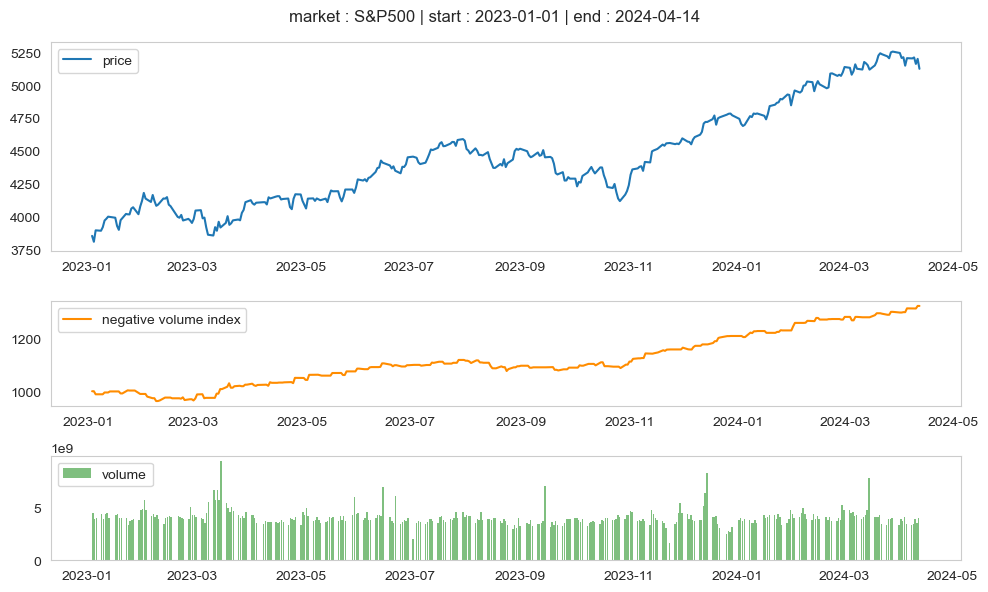

In [4]:
import matplotlib.gridspec as gridspec

plt.figure(figsize = (10, 6))
plt.subplot(3, 1, 1)
gs = gridspec.GridSpec(3, 1, height_ratios=[2, 1, 1]) 

plt.subplot(gs[0])
plt.plot(data['Close'][1:])
plt.grid(False)
plt.legend(['price'])

plt.subplot(gs[1])
plt.plot(nvi, color = 'darkorange')
plt.grid(False)
plt.legend(['negative volume index'])

plt.subplot(gs[2])
plt.bar(data['Volume'][1:].index, data['Volume'][1:], color = 'green', edgecolor = 'none', alpha = 0.5)
plt.grid(False)
plt.legend(['volume'])

plt.suptitle(f'market : S&P500 | start : {start_date} | end : {end_date}')
plt.tight_layout()
plt.show()